In [1]:
import numpy as np
import pandas as pd
import re
import csv

print ("TEST".lower())

test


In [2]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import porter
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/cavtheman/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cavtheman/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Read the CSV file

In [4]:
data = pd.read_csv("news_sample.csv")

Manually inspect the data to get an idea of potential problems that need to be fixed.

In [5]:
data[:3]

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN


In [8]:
data["content"][2]

"Never Hike Alone: A Friday the 13th Fan Film USA | 2017 | 54 min A fan tribute to Friday the 13th, Never Hike Alone follows an adventure\n\nNever Hike Alone: A Friday the 13th Fan Film USA | 2017 | 54 min\n\n\n\nA fan tribute to Friday the 13th, Never Hike Alone follows an adventure blogger, Kyle McLeod (Andrew Leighty), who uncovers the long lost remains of Camp Crystal Lake while on a solo backpacking trip.\n\nIgnoring the campfire tales from his childhood, Kyle's search turns deadly when he makes the grave mistake of crossing the path of Camp Blood’s legendary mass murderer, Jason Voorhees.\n\nStranded in the forest with Jason on his heels, Kyle must push his survival skills to their limits if he hopes to survive the night.\n\nOtherwise, he'll wind up as another lost victim of the cursed camp.\n\n\n\nDIRECTED BY\n\nVINCENTE DISANTI\n\n\n\nSCREENPLAY BY\n\nVINCENTE DISANTI and NATHAN MCLEOD\n\n\n\nBASED ON CHARACTERS CREATED BY\n\nSEAN CUNNINGHAM\n\nVICTOR MILLER\n\nRON KURTZ\n\n\n\

Clean the data. First, we'll try to do this manually, by writing our own clean_text() function that uses regular expressions. The function should take raw text as input and return a version of the text with the following modifications:
all words must be lowercased
it should not contain multiple white spaces, tabs or new lines
numbers, dates, emails and urls should be replaced by "\<NUM>", "\<DATE>", "\<EMAIL>" AND "\<URL>", respectively. Note that replacing dates with \<DATE> is particularly tricky as dates can be expressed in many forms. It's ok to to just choose one or a few common date formats present in the data set and only replace those.

In [9]:
def clean_text(text):
    text = str(text)
    text = re.sub(r'([a-zA-Z]*.? \d{1,2},? \d{4}|[a-zA-Z]{3}.? \d{1,2} \d{4}|\d{1,2}[/-]\d{1,2}[/-]\d{4})','<DATE>',text)
    text = re.sub(r'https?://[w]{0,3}\.?[a-z]+\.[a-z]\w*.*|[w]{3}\.\w+\.\w+\w*.*', '<URL>',text)
    text = re.sub(r'(?:^|(?<=[^\w,.]))[+–-]?(([1-9]\d{0,2}(,\d{3})+(\.\d*)?)|([1-9]\d{0,2}([ .]\d{3})+(,\d*)?)|(\d*?[.,]\d+)|\d+)(?:$|(?=\b))', '<NUM>',text)
    text = re.sub(r'(?:^|(?<=[^\w@.)]))([\w+-](\.(?!\.))?)*?[\w+-]@(?:\w-?)*?\w+(\.([a-z]{2,})){1,3}(?:$|(?=\b))', "<EMAIL>",text)
    text = re.sub(r'(\\n)+|(\\t)+|\s{2,}'," ",text)
    text = text.lower()
    return text

In [10]:
print(clean_text(data["content"][2]))

never hike alone: a friday the 13th fan film usa | <num> | <num> min a fan tribute to friday the 13th, never hike alone follows an adventure never hike alone: a friday the 13th fan film usa | <num> | <num> min a fan tribute to friday the 13th, never hike alone follows an adventure blogger, kyle mcleod (andrew leighty), who uncovers the long lost remains of camp crystal lake while on a solo backpacking trip. ignoring the campfire tales from his childhood, kyle's search turns deadly when he makes the grave mistake of crossing the path of camp blood’s legendary mass murderer, jason voorhees. stranded in the forest with jason on his heels, kyle must push his survival skills to their limits if he hopes to survive the night. otherwise, he'll wind up as another lost victim of the cursed camp. directed by vincente disanti screenplay by vincente disanti and nathan mcleod based on characters created by sean cunningham victor miller ron kurtz starring: andrew leighty as kyle mcleod vincente disan

Now, let's try to use a library for cleaning the data. The clean-text module (https://pypi.org/project/clean-text/ (Links to an external site.)) provides out-of-the-box functionality for much of the cleaning we did in the previous exercise. Use it to implement the same cleaning steps as in your own clean_text implementation.

In [11]:
pip install clean-text[gpl]

SyntaxError: invalid syntax (<ipython-input-11-0f06632984c7>, line 1)

In [14]:
from cleantext import clean

In [15]:
def fast_clean(text):
    return clean(text, no_urls=True, no_numbers = True, no_emails = True, no_line_breaks=True) 

In [16]:
fast_clean(data["content"][2])

'never hike alone: a friday the 13th fan film usa | <number> | <number> min a fan tribute to friday the 13th, never hike alone follows an adventure never hike alone: a friday the 13th fan film usa | <number> | <number> min a fan tribute to friday the 13th, never hike alone follows an adventure blogger, kyle mcleod (andrew leighty), who uncovers the long lost remains of camp crystal lake while on a solo backpacking trip. ignoring the campfire tales from his childhood, kyle\'s search turns deadly when he makes the grave mistake of crossing the path of camp blood\'s legendary mass murderer, jason voorhees. stranded in the forest with jason on his heels, kyle must push his survival skills to their limits if he hopes to survive the night. otherwise, he\'ll wind up as another lost victim of the cursed camp. directed by vincente disanti screenplay by vincente disanti and nathan mcleod based on characters created by sean cunningham victor miller ron kurtz starring: andrew leighty as kyle mcleo

In [17]:
cleaned_data = data.copy()
cleaned_data["content"] = data.apply(lambda x: clean_text(x["content"]), axis=1)
contents_of_data = list(cleaned_data["content"])
string_of_contents = ",".join([content for content in contents_of_data])

Now that we are done cleaning, we can start process the text. The nltk library (https://www.nltk.org/ (Links to an external site.)) has built-in support for many of the most common operations. Try to:
Tokenize the text.
Remove stopwords and compute the size of the vocabulary. Compute the reduction rate of the vocabulary size after removing stopwords.
Remove word variations with stemming and compute the size of the vocabulary. Compute the reduction rate of the vocabulary size after stemming.

In [18]:
cleaned_data["content"][0]

'sometimes the power of christmas will make you do wild and wonderful things. you do not need to believe in the holy trinity to believe in the positive power of doing good for others. the simple act of giving without receiving is lost on many of us these days, as worries about money and success hold us back from giving to others who are in need. one congregation in ohio was moved to action by the power of a sermon given at their church on christmas eve. the pastor at grand lake united methodist church in celina, ohio gave an emotional sermon about the importance of understanding the message of jesus. for many religious people the message of jesus is to help others before yourself, to make sure the people who are suffering get the help they need to enjoy life a little bit. the sermon was really about generosity and what that can look like in our lives. jesus lived a long time ago and he acted generously in the fashion of his time – but what would a generous act look like in our times? t

In [19]:
tokens = word_tokenize(string_of_contents)
vocab = set(tokens)
print("The size of vocabulary is", len(vocab))

The size of vocabulary is 16956


In [20]:
tokens[:10]

['sometimes',
 'the',
 'power',
 'of',
 'christmas',
 'will',
 'make',
 'you',
 'do',
 'wild']

In [21]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [22]:
tokens_without_sw = [word for word in tokens if not word in stopwords.words('english')]
vocab_without_sw = set(tokens_without_sw)

In [23]:
print("The size of vocabulary without stopwords is", len(vocab_without_sw))

The size of vocabulary without stopwords is 16810


In [24]:
tokens_without_sw[:10]

['sometimes',
 'power',
 'christmas',
 'make',
 'wild',
 'wonderful',
 'things',
 '.',
 'need',
 'believe']

In [25]:
num_of_rmved_vocab = len(vocab) - len(vocab_without_sw)
reduction_rate = (len(vocab) - len(vocab_without_sw))/len(vocab)
print("We have removed %d stopwords." %num_of_rmved_vocab, \
      "The reduction rate of the vocabulary size is %0.3f." %reduction_rate)

We have removed 146 stopwords. The reduction rate of the vocabulary size is 0.009.


Remove word variations with stemming and compute the size of the vocabulary. Compute the reduction rate of the vocabulary size after stemming.

In [26]:
stemmer = porter.PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in tokens]
vocab_after_stemming = set(stemmed_tokens)

In [27]:
redunction_rate_after_stemming = (len(vocab) - len(vocab_after_stemming))/len(vocab)
print("The reduction rate of the vocabulary size after stemming is %0.3f." %redunction_rate_after_stemming)

The reduction rate of the vocabulary size after stemming is 0.306.


Part 2 

Next, perform an exploratory evaluation of the cleaned data and report the results. The exploration can include (but need not be limited to):

1. counting the number of URLs in the data
2. counting the number of dates in the data
3. counting the number of numeric values in the data
4. determining the 100 more frequent words that appear in the data
5. plotting the frequency of the 10000 most frequently occurring words (do you seen any interesting patterns?)
6. run the analysis in point 4 and 5 both before and after removing stopwords and applying stemming: do you see any difference?

In [28]:
num_url = 0
for i in string_of_contents.split(" "):
    if i == "<url>":
        num_url +=1
num_dates = 0
for i in string_of_contents.split(" "):
    if i == "<date>":
        num_dates +=1
num_numeric = 0
for i in string_of_contents.split(" "):
    if i == "<num>":
        num_numeric +=1        
print("the number of URLs in the data is %d" % num_url)
print("the number of dates in the data is %d" % num_dates)
print("the number of numeric values in the data is %d" % num_numeric)

the number of URLs in the data is 126
the number of dates in the data is 61
the number of numeric values in the data is 983


In [29]:
def count_words(vocabulary, tokens):
    count_word = dict.fromkeys(vocabulary, 0)    
    for i in tokens:
        if i in count_word:
            count_word[i]+=1
    sorted_dict = dict(sorted(count_word.items(), key=lambda x: x[1], reverse=True))
    return sorted_dict

In [30]:
sorted_dict_original = count_words(vocab, tokens)

In [31]:
print("top 100 most frequent words are:", list(sorted_dict_original.items())[:100])

top 100 most frequent words are: [('the', 9471), (',', 8802), ('.', 7131), ('of', 4958), ('to', 4873), ('and', 4664), ('a', 3366), ('in', 3102), ('>', 2537), ('<', 2531), ('is', 2299), ('that', 2289), ('’', 2284), ('num', 2182), ('it', 1626), ('for', 1541), ('s', 1414), ('you', 1232), ('are', 1226), ('on', 1158), ('with', 1157), ('this', 1142), (':', 1093), ('as', 1079), ('i', 1005), ('“', 987), ('”', 930), ('be', 922), ('by', 836), ('have', 791), ('was', 788), ('not', 783), ('from', 708), (')', 706), ('(', 705), ('at', 704), ('we', 685), ('or', 684), ('they', 641), ('but', 593), ('your', 555), ('has', 543), ('can', 525), ('an', 519), ('their', 515), ('?', 491), ('all', 486), ('will', 486), ('more', 468), ('about', 462), ('what', 453), ('he', 451), ('!', 451), ('if', 448), ('one', 436), ('who', 422), ('there', 420), ('t', 392), ('which', 388), ('so', 387), ('people', 383), ('–', 365), ('our', 361), ('were', 357), ('his', 356), ('these', 348), ('trump', 345), ('been', 345), ('no', 336),

In [32]:
import matplotlib.pyplot as plt
most_10000 = list(sorted_dict_original.values())[:10000]
plt.plot(np.linspace(0,10000,10000),most_10000)

top 100 most frequent words are: [(',', 8802), ('.', 7131), ('>', 2537), ('<', 2531), ('’', 2284), ('num', 2182), (':', 1093), ('“', 987), ('”', 930), (')', 706), ('(', 705), ('?', 491), ('!', 451), ('one', 436), ('people', 383), ('–', 365), ('trump', 345), ('like', 328), ('would', 323), ('time', 290), ('us', 282), ('also', 276), ('new', 270), (';', 260), ('blockchain', 260), ('url', 232), ('said', 229), ('many', 225), ('market', 216), ('next', 212), ('even', 211), ('&', 206), ('could', 206), ('government', 199), ('think', 197), ('state', 192), ('way', 188), ('president', 188), ('two', 185), ('see', 183), ('``', 182), ('world', 180), ('first', 180), ('$', 176), ('life', 174), ('may', 170), ("''", 170), ('make', 167), ('%', 166), ("'s", 160), ('u.s.', 159), ('things', 157), ('take', 154), ('get', 151), ('years', 148), ('bitcoin', 147), ('obama', 145), ('much', 142), ('stocks', 141), ('—', 138), ('states', 137), ('fact', 136), ('headline', 135), ('-', 135), ('going', 134), ('use', 133), 

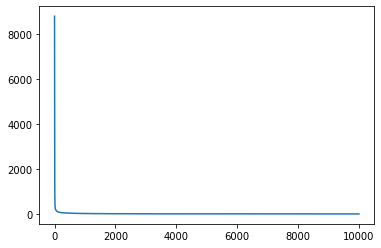

In [33]:
sorted_dict_without_sw = count_words(vocab_without_sw, tokens_without_sw)
print("top 100 most frequent words are:", list(sorted_dict_without_sw.items())[:100])
most_10000_without_sw = list(sorted_dict_without_sw.values())[:10000]
plt.plot(np.linspace(0,10000,10000),most_10000_without_sw)

top 100 most frequent words are: [('the', 9471), (',', 8802), ('.', 7131), ('of', 4958), ('to', 4875), ('and', 4664), ('a', 3366), ('in', 3102), ('>', 2537), ('<', 2531), ('is', 2299), ('that', 2289), ('’', 2284), ('num', 2182), ('it', 1930), ('for', 1541), ('s', 1414), ('you', 1232), ('are', 1226), ('on', 1159), ('with', 1157), ('be', 1143), ('thi', 1142), (':', 1093), ('as', 1079), ('i', 1005), ('“', 987), ('”', 930), ('have', 865), ('by', 836), ('wa', 789), ('not', 784), ('from', 708), (')', 706), ('(', 705), ('at', 704), ('we', 685), ('or', 684), ('they', 641), ('but', 593), ('your', 558), ('ha', 545), ('can', 525), ('an', 519), ('their', 516), ('will', 503), ('?', 491), ('all', 486), ('more', 468), ('about', 462), ('one', 460), ('what', 455), ('he', 451), ('!', 451), ('if', 448), ('who', 422), ('there', 420), ('like', 406), ('t', 392), ('time', 391), ('which', 388), ('so', 387), ('peopl', 386), ('do', 368), ('state', 365), ('–', 365), ('our', 362), ('hi', 359), ('were', 357), ('tr

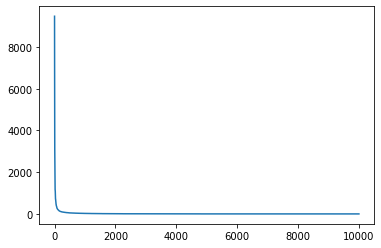

In [34]:
sorted_dict_after_stemming = count_words(vocab_after_stemming, stemmed_tokens)
print("top 100 most frequent words are:", list(sorted_dict_after_stemming.items())[:100])
most_10000_after_stemming = list(sorted_dict_after_stemming.values())[:10000]
plt.plot(np.linspace(0,10000,10000),most_10000_after_stemming)